# Flood frequency curves for the Amazon

## Load data
The data we use in this study consists of HYBAM observed streamflow records and simulated present climate streamflow simulations run by EC-EARTH and PCR-GLOBWB.
The data are preprocessed in ([Preprocessing streamflow records](../python/Preprocess.ipynb)), selecting the annual maximum monthly streamflow.

Here we load the required packages and the data

In [1]:
library('UNSEEN')
library('dplyr')
library('ggplot2')
library('extRemes')
library('qmap')
library('moments')

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Lmoments

Loading required package: distillery


Attaching package: ‘extRemes’


The following objects are masked from ‘package:stats’:

    qqnorm, qqplot


Loading required package: fitdistrplus

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: survival



In [2]:
## The CABra observations, with a homogeneous period over all three Amazonian subcatchments of interest. 
Observations_pooled_annual_df <- read.csv(file = '../Data/Observations_pooled_annual_df.csv')

# Obidos_record_annual_df_CABra <- read.csv(file ='../Data/Obidos_CABra_record_annual_df.csv')
# Xingu_record_annual_df_CABra <- read.csv(file ='../Data/Xingu_CABra_record_annual_df.csv')
# Tapajos_record_annual_df_CABra <- read.csv(file ='../Data/Tapajos_CABra_record_annual_df.csv')


We convert the streamflow to specific discharge to allow for a meaningful comparison between observations and simulations (and adjust for the difference in the catchment size). We obtain the catchment size from the [CABra shiny app](https://thecabradataset.shinyapps.io/CABra/).   

In [3]:
area_Obidos <- 4807564 * 1e6# in km2 -> m2. From GRDC data 4640300: https://www.compositerunoff.sr.unh.edu/html/Polygons/P3629000.html
area_Xingu <- 447711 * 1e6# in km2 -> m2. 
area_Tapajos <- 459185 * 1e6# in km2 -> m2.
area_Amazon <- 5756000 * 1e6# in km2 -> m2. Obtained from model mask. 

And we calculate the specific discharge for 
1. Obidos + Tapajos + Xingu (Observed pooled)
2. the simulations at the Amazon mouth (UNSEEN)

The catchment areas of Obidos, Tapajos, and Xingu represent 99,3% of the catchment area within the model simulations and, hence, can be reasonably compared. 

In [4]:
(area_Obidos + area_Xingu + area_Tapajos) / area_Amazon * 100

[1] 99.27832

In [5]:
##Convert m3/s to mm/h -> divide by area (m3 to m) times 1000 (m to mm) and times 3600 (sec to hour) 
## Monthly sum -> times 24 (hourly to daily) times 31 (days in July)
Observed_pooled <- ((Observations_pooled_annual_df$Streamflow) /
                         (area_Obidos + area_Xingu + area_Tapajos) * 1000 * 3600 * 24 #* 31
                         )

UNSEEN <- Amazon_annual_df$discharge / area_Amazon * 1000 * 3600 * 24 #* 31


We apply quantile mapping to adjust the annual maximum streamflow simulations to the observed record. We use the homogeneous observations and simulations for the Amazon outlet. 


In [6]:
fit_qmap <- fitQmap(obs = Observed_pooled,
                    mod = UNSEEN,
                    method="QUANT", #method=c("RQUANT","QUANT","SSPLIN")
                    wet.day = FALSE) 

UNSEEN_qmap_lin <- doQmap(x = UNSEEN,
                                 fobj = fit_qmap,
                                 type='linear') 

We then plot the empirical extreme value distributions for the observed record and the UNSEEN data.  

In [7]:
## Load source code to plot extreme value distributions 
source('src/evt_plot.r')

In [8]:
## For the legend we define the names and their corresponding colors here
cols <- c("UNSEEN unadjusted" = "#E69F00","UNSEEN scaled" = "#009E73","UNSEEN Qmap" = "red", "OBSERVED pooled" = "blue", "OBSERVED adjusted" = "black") ##  for  the legend

## And then plot
p1 <- ggplot() +
  geom_EVT_GEV(data = Observed_pooled, 
               GEV_type = 'GEV',
               estimation_method = "MLE",
               CI_method = "boot",
               CI_significance = 0.05,
               transparency = 0.1,
               name = "OBSERVED pooled") +
  geom_EVT_empirical(UNSEEN, name = "UNSEEN unadjusted") +
  geom_EVT_empirical(UNSEEN * mean(Observed_pooled)/mean(UNSEEN), name = "UNSEEN scaled") + # scaling factor mean annual maxima
  geom_EVT_empirical(UNSEEN_qmap_lin, name = "UNSEEN Qmap") +
#   geom_EVT_empirical(Observed, name = "OBSERVED unadjusted") +
  geom_EVT_empirical(Observed_pooled, name = "OBSERVED pooled") +
scale_x_continuous(trans = "log10") +
  scale_colour_manual(name = "Data", values = cols) +
  scale_fill_manual(name = "GEV", values = cols) +
  theme_classic() +
  theme(
    legend.title = element_blank(),
    text = element_text(size = 9),
    axis.text = element_text(size = 9),
    legend.text = element_text(size = 10)
  ) +
  labs(y = "Specific discharge (mm/d)", x = "Return period (years)") +
  guides(fill = FALSE,
         color = guide_legend(override.aes = list(linetype = 0)))

Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning mes

In [9]:
## And for just obs and Qmap
p2 <- ggplot() +
  geom_EVT_GEV(data = Observed_pooled, 
               GEV_type = 'GEV',
               estimation_method = "MLE",
               CI_method = "boot",
               CI_significance = 0.05,
               transparency = 0.1,
               name = "OBSERVED pooled") +
  geom_EVT_empirical(UNSEEN_qmap_lin, name = "UNSEEN Qmap") +
#   geom_EVT_empirical(Observed, name = "OBSERVED unadjusted") +
  geom_EVT_empirical(Observed_pooled, name = "OBSERVED pooled") +
  scale_x_continuous(trans = "log10") +
  scale_colour_manual(name = "Data", values = cols) +
  scale_fill_manual(name = "GEV", values = cols) +
  theme_classic() +
  theme(
    legend.title = element_blank(),
    text = element_text(size = 9),
    axis.text = element_text(size = 9),
    legend.text = element_text(size = 10)
  ) +
  labs(y = "Specific discharge (mm/d)", x = "Return period (years)") +
  guides(fill = FALSE,
         color = guide_legend(override.aes = list(linetype = 0)))

Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”


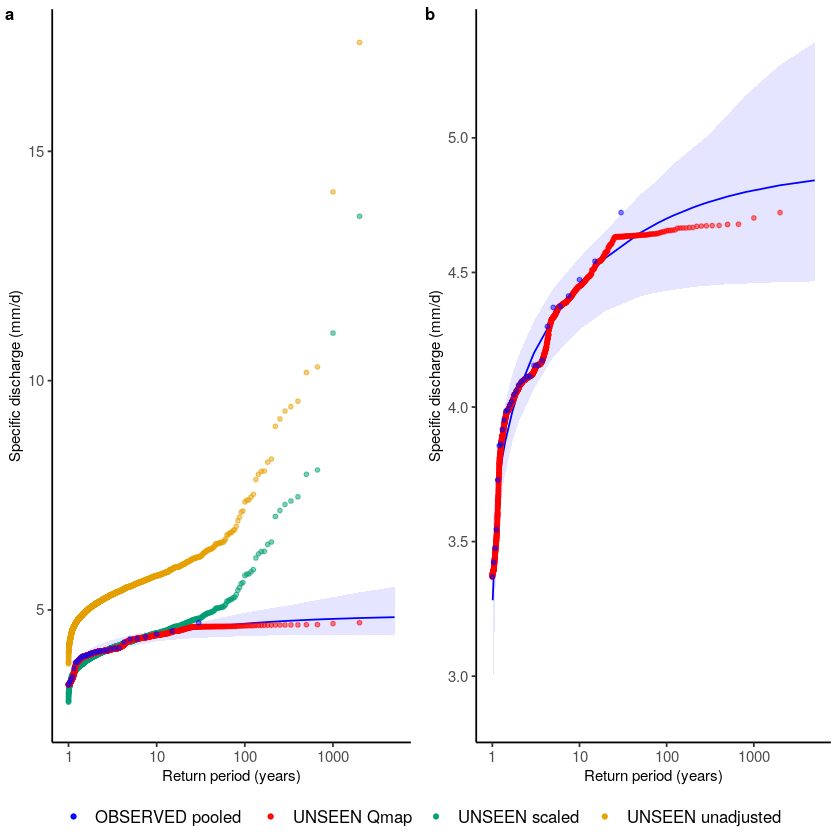

In [10]:
ggarrange(p1,p2,
          common.legend = TRUE,
          legend = "bottom",
          labels = c("a", "b"),
          font.label = list(size = 10, color = "black", face ="bold", family = NULL),
          # vjust = 0,
          ncol = 2, nrow = 1) #%>% 
#   ggsave(filename = '../Graphs/Extreme_value_plot_corrections_obs_test.pdf',width =174,height = 75, units='mm',dpi=300) #174 for wide graphs

### Testing bias corrections
We test the consistency between the simulated and observed annual maximum specific discharge. 

Warning message:
“Removed 697 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1446 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_vline).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_vline).”
Warning message:
“Removed 1580 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1582 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_vline).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows co

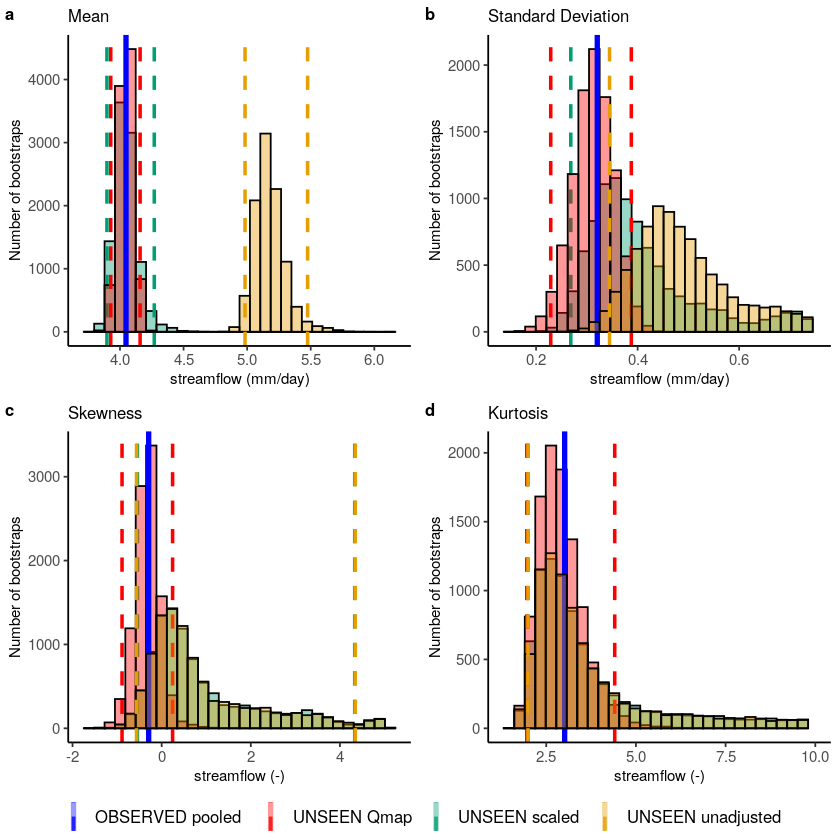

In [11]:
Fidelity_test_biascor(obs = Observed_pooled,
                      color_obs = "OBSERVED pooled",
                      ensemble = UNSEEN,
                      fill_ensemble = "UNSEEN unadjusted",
                      ensemble_cor1 = UNSEEN * mean(Observed_pooled)/mean(UNSEEN),
                      fill_ensemble_cor1 = "UNSEEN scaled",
                      ensemble_cor2 = UNSEEN_qmap_lin,
                      fill_ensemble_cor2 = "UNSEEN Qmap",
                      xlim_sd = c(NA,0.75),
                      xlim_kurt =c(NA,10),
                      cols = cols,
                      fontsize = 10
                      ) #%>% 
#   ggsave(filename = '../Graphs/Fidelity_biascor_obs_test.pdf',width =174,height = 120, units='mm',dpi=300) #174 for wide graphs

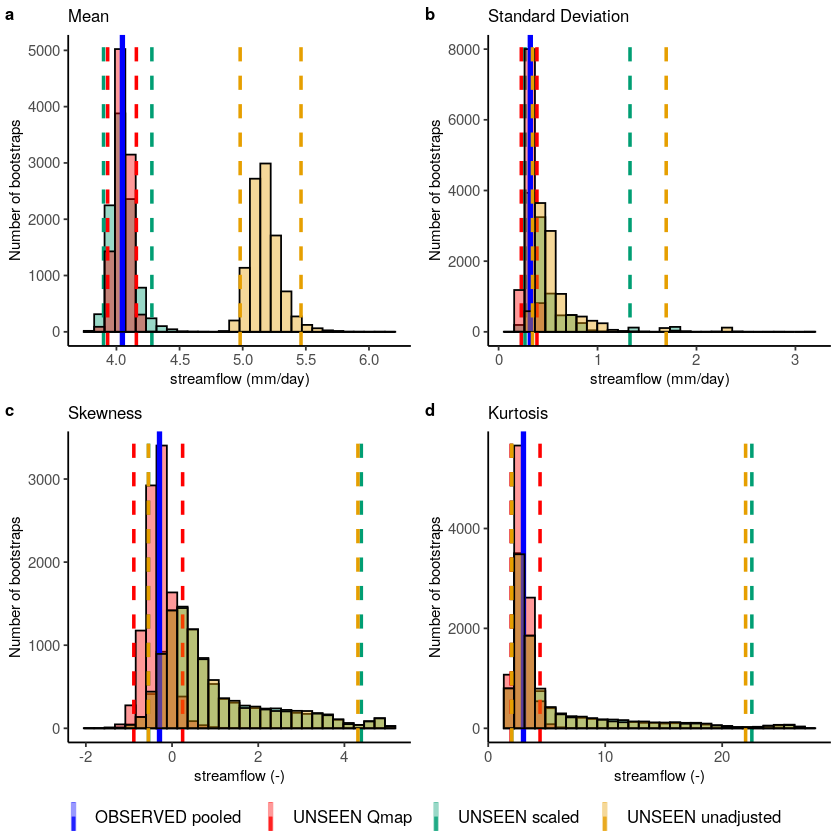

In [12]:
Fidelity_test_biascor(obs = Observed_pooled,
                      color_obs = "OBSERVED pooled",
                      ensemble = UNSEEN,
                      fill_ensemble = "UNSEEN unadjusted",
                      ensemble_cor1 = UNSEEN * mean(Observed_pooled)/mean(UNSEEN),
                      fill_ensemble_cor1 = "UNSEEN scaled",
                      ensemble_cor2 = UNSEEN_qmap_lin,
                      fill_ensemble_cor2 = "UNSEEN Qmap",
                      # xlim_sd = c(NA,1),
                      # xlim_kurt =c(NA,10),
                      cols = cols,
                      fontsize = 10
                      ) #%>% 
#   ggsave(filename = '../Graphs/Fidelity_biascor_fullrange_obs_test.pdf',width =174,height = 120, units='mm',dpi=300) #174 for wide graphs